<a href="https://colab.research.google.com/github/TacticalCoders/NLP-with-Pytorch/blob/main/8_1~_8_4_S2S_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 자연어 처리를 위한 시퀀스 모델링 - 고급

**시퀀스-투-시퀀스 모델링(sequence-to-sequence modeling, S2S)**은 시퀀스를 입력받아 다른 시퀀스를 출력으로 만든다. 입력과 출력 시퀀스는 길이가 다를 수 있다. 

S2S는 이메일 답장 만들기, 프랑스어 문장을 영어로 번역하기, 기사 요약하기 등에 사용할 수 있다. 여기서는 시퀀스 모델의 변종 양방향 모델과, 시퀀스 표현을 최대로 활용하기 위해 어텐션 메커니즘을 알아볼 것이다. 그 다음 신경망 기계 번역을 구현해보자.

## 인코더-디코더 모델, 조건부 생성

S2S 모델은 **인코더-디코더 모델**(encoder - decoder model)이라는 신경망 모델의 일종이다.

인코더-디코더 모델은 **인코더(encoder)**와 **디코더(decoder)** 모델로 구성된다.

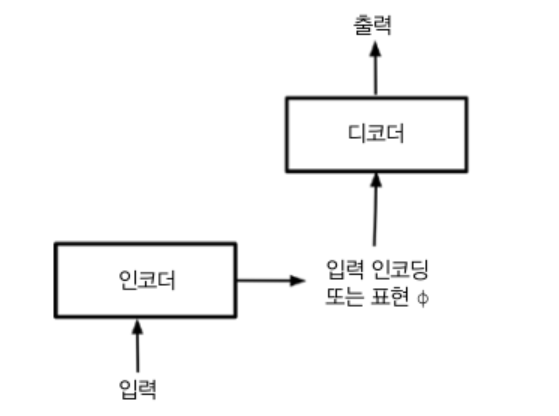

인코더 모델은 입력(시퀀스)을 받아 인코딩 또는 표현을 만든다. 출력 결과는 일반적으로 벡터하나이다. 

인코더는 입력에서 현재 문제와 관련된 중요한 성질을 감지하고, 디코더는 인코딩된 입력을 받아 원하는 출력을 만드는 데 사용한다.

또 인코더 디코더 모델은 **조건부 생성 모델**(conditioned generation model)의 일종이다. 조건부 생성에서는 입력 표현 대신 일반적인 조건 문맥 c를 사용해 디코더가 출력을 만든다. 

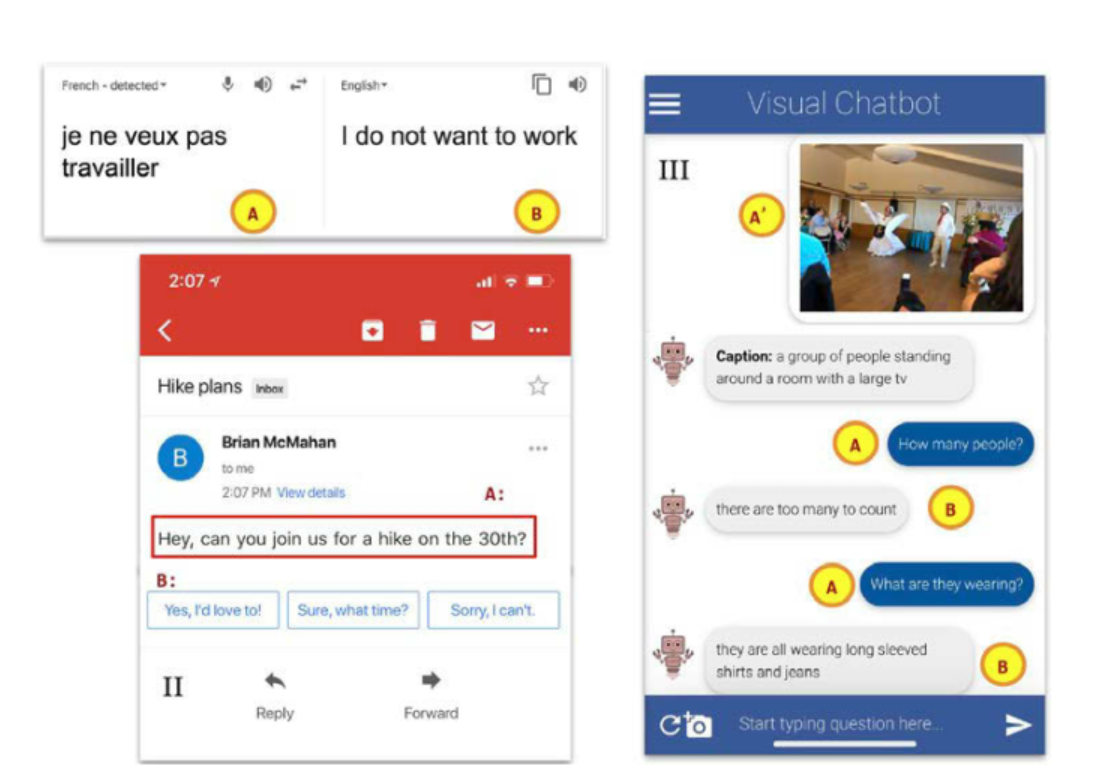

기계 번역, 이메일 응답 추천, 챗봇 등의 작업 모두 조건부 생성 작업이라 할 수 있다. 

또한 입력한 텍스트를 자동으로 이모지(emoji)로 바꾸는 작업을 보면,
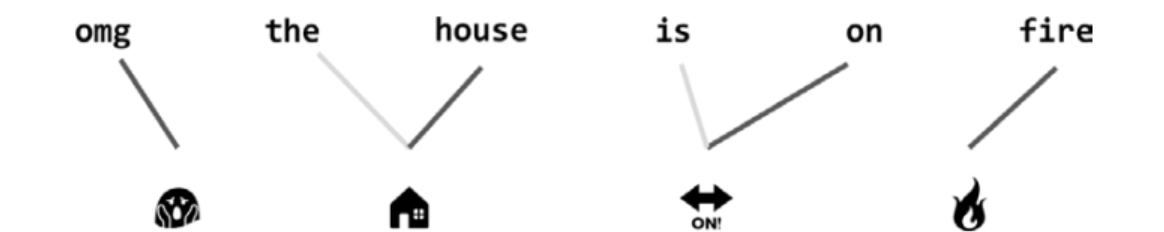

이처럼 입력과 출력의 길이가 다른데, 입력과 출력 사이의 매핑을 정렬(alignment)라고 한다.

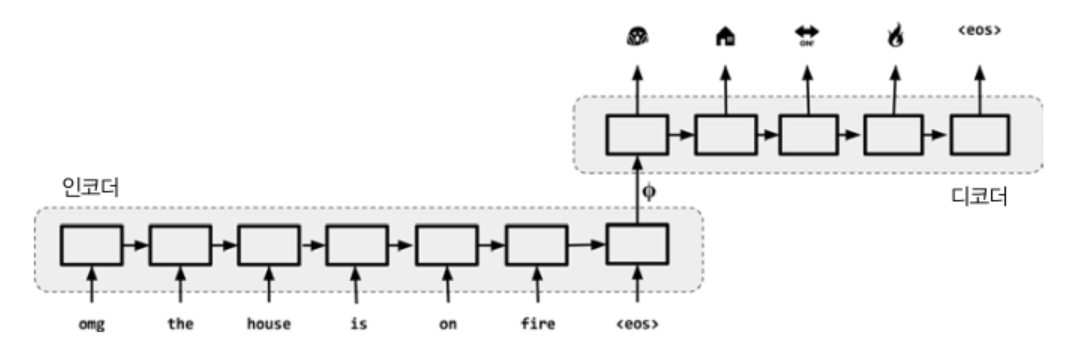

위의 그림에서 알 수 있듯이 many-to-one RNN과 one-to-many RNN이 합쳐진 것이 S2S다.

## **양방향 순환 모델**

순환 모델은 시퀀스를 벡터로 인코딩하는 블랙 박스로 생각할 수 있다.

시퀀스를 모델링할 때 지난 단어와 함께 앞으로 나타날 단어를 관찰하면 도움이 된다.

즉, 과거와 미래의 정보를 합치면 문장에 있는 단어의 의미를 안정적으로 표현할 수 있다.  

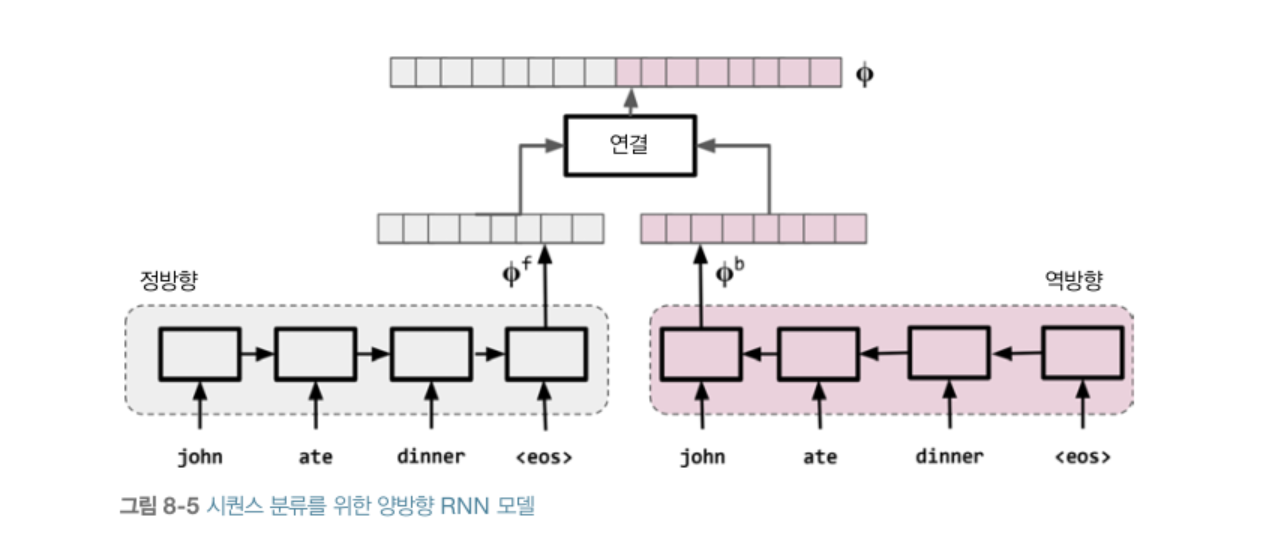

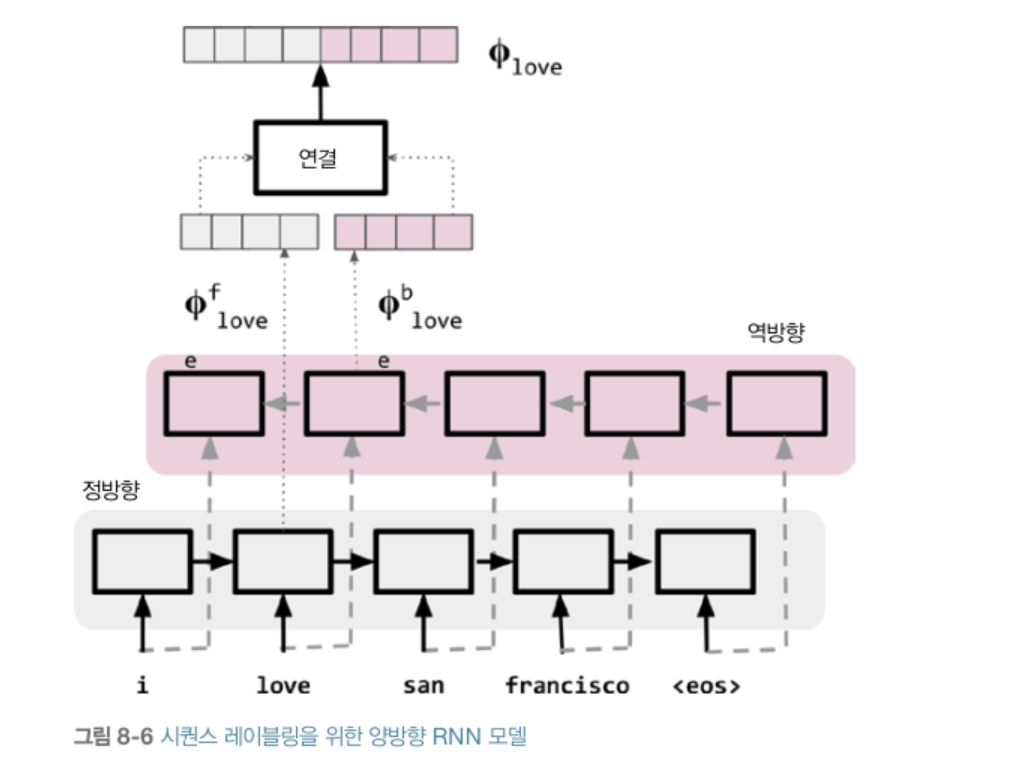

## **어텐션(attention mechanism)**

맨 앞에서 소개한 S2S 모델에는 전체 입력 문장을 하나의 벡터에 압축한다는 문제가 있다. 이런 모델은 매우 짧은 문장에서만 통할 뿐 긴 문장에서는 전체 입력 정보를 감지하지 못한다. 이는 인코딩에 최종 은닉 상태만 사용하기 제약 때문이다. 

사람은 문장을 번역할 때 문장의 의미를 추출한 뒤(인코딩) 이를 바탕으로 번역하지 않는다. 사람은 출력을 생성할 때 **관련된 입력**(원래 문장) 부분에 초점을 맞춘다. 이런 현상을 어텐션(attention)이라고 한다. 우리는 글을 읽을 때 읽고 있는 모든 단어에 어텐션을 부여한다. 한 단어를 읽을 때 주변 단어에 주의를 기울이고 절과 장의 주제에 주의를 기울인다.

따라서 입력의 최종 요약이 아니라 입력의 여러 부분에 어텐션을 부여하는 시퀀스 생성 모델을 만들 수 있다. 이를 어텐션 메커니증이라고 부른다.

### 심층 신경망의 어텐션

어텐션은 일반적인 메커니즘이며 이 책의 서두에서 소개한 모든 모델에 사용할 수 있다. S2S에도 당연이 어텐션을 적용할 수 있다.

S2S 모델은 각 타임스텝에서 은닉 상태를 생성한다. 어텐션을 사용하면 최종 은닉 상태뿐만 아니라 중간 타임 스텝의 은닉 상태도 고려한다. 이런 은닉 상태를 값(value) 또는 키(key)라고 부른다. 또 디코더의 이선 은닉 상태도 고려하는데 이를 쿼리(query)라고 부른다.

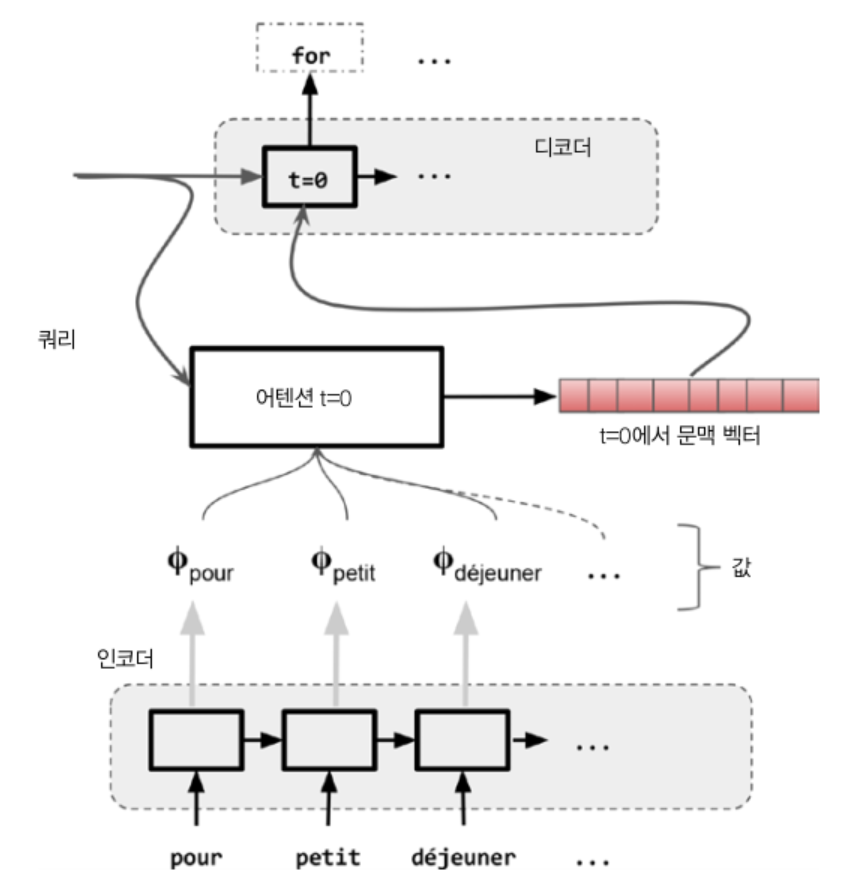

타임스텝 t=0의 쿼리 벡터는 고정된 하이퍼 파라미터이다. 어텐션은 주의를 기울이려는 값의 개수와 차원이 같은 벡터 하나로 표현된다. 이를 어텐셕 벡터(attention vector) 또는 어텐션 가중치(attenttion weight), 때로는 정렬이라 부른다.

어텐션 가중치는 인코더 상태(값)과 연결되어 문맥 벡터(context vector)를 생성한다. 이를 글림스(glimpse)라고도 부른다. 바로 이 문맥 벡터가 디코더의 입력이 된다. 다음 타임 스텝의 어텐션 벡터는 호환성 함수를 사용해 업데이트 된다.

## 시퀀스 생성 모델 평가

시퀀스 생성에는 정답이 여럿일 수 있다. 따라서 시퀀스 모델은 참조 출력(reference output)이라는 기대 출력으로 평가한다. 즉, 여러 모델을 비교할 때 모델의 출력이 **얼마나 참조 출력에 가까운지**를 점수로 매긴다.

예를 들어 기계 번역 작업에서 이해할 수 없는 번역문 보다는 한 단어만 틀린 모델에 높은 점수를 주는 것이다. 

하나에 샘플에 참조 출력은 여럿일 수 있다. 그럼 그 점수를 누가 매길까? 사람이 직접 매길 수도 있고 자동으로 할 수도 있다. 이를 각각 **사람 평가**와 **자동 평가**라 한다.

기계 번역에서 사람 평가는 한 명 이상의 사람이 모델 출력에 '좋음' '나쁨'을 표시하거나 번역을 고치는 방법이다. 사람 평가는 중요하지만, 평가 속도가 느리고 비용이 많이들며 구하기 어렵다. 또 사람들간의 평가가 다를 수 있으므로 반드시 평가자 간의 일치율과 함께 사용해야 한다.

대표적으로 사용하는 지표는 **HTER**이다. 사람이 번역결과를 추가, 삭제, 이동한 횟수를 헤아려 계사한 가중치가 적용된 편집 거리이다.

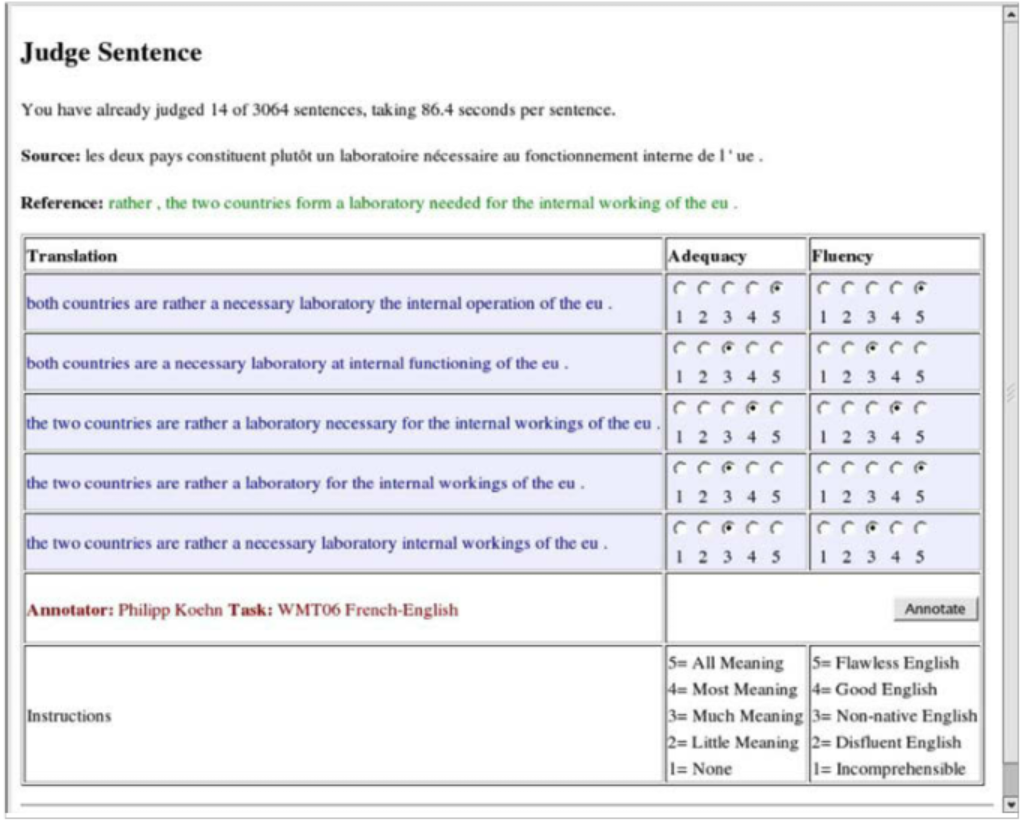

반면 자동 평가는 쉽고 빠르다. 평가 지표로는 n-그램 중복 기반 지표와 혼란도가 있다. n-그램 중복 기반 지표는 참조와 출력이 얼마나 가까운지 n-그램 중복 통계로 점수를 계산한다. **BLEU**(BiLingual Evaluation Understudy)는 기계 번역 논문에서 측정 지표로 오래 사용되었다. (파피네니의 2002년 논문 참고)

혼란도 역시 정보 이론에 기반한 자동 평가 지표이다. 출력 시퀀스의 확률을 측정할 수 있다면 적용가능하다. 